<a href="https://colab.research.google.com/github/ss1705/ai-traffic-system/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install ultralytics easyocr opencv-python matplotlib


In [4]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import os

In [2]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="VETlU39STV1kBImf0Kl2")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(6)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [6]:
dataset_path = "/content/License-Plate-Recognition-6"  # Update this path

image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png'))]

In [8]:
from ultralytics import YOLO

# Load YOLOv8 model for training
model = YOLO("yolov8n.pt")  # Uses a base YOLOv8 model for training

# Train YOLOv8 on your dataset with four workers
model.train(data="/content/License-Plate-Recognition-6/data.yaml",
            epochs=50,
            batch=16,
            imgsz=640,
            workers=4,  # Number of data loading workers
            device="cuda")

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/License-Plate-Recognition-6/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=4, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

train: Scanning /content/License-Plate-Recognition-6/train/labels.cache... 7057 images, 5 backgrounds, 0 corrupt: 100%|██████████| 7057/7057 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/License-Plate-Recognition-6/valid/labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.5G      1.296      1.504      1.171          3        640: 100%|██████████| 442/442 [02:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.56it/s]


                   all       2048       2195      0.928      0.854        0.9      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.25G       1.29      0.886      1.167          2        640: 100%|██████████| 442/442 [01:59<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.84it/s]


                   all       2048       2195      0.922      0.856      0.907      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.23G      1.294     0.8141      1.174          3        640: 100%|██████████| 442/442 [01:59<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.89it/s]


                   all       2048       2195      0.935       0.88      0.925      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.23G      1.261     0.7665       1.15          3        640: 100%|██████████| 442/442 [01:57<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.89it/s]


                   all       2048       2195      0.928      0.882       0.92      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.24G      1.252     0.7286      1.154          1        640: 100%|██████████| 442/442 [01:59<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.90it/s]


                   all       2048       2195       0.96      0.898      0.942      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.24G      1.235     0.6988       1.14          1        640: 100%|██████████| 442/442 [01:58<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.74it/s]


                   all       2048       2195      0.934      0.903      0.932      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.24G      1.215     0.6764      1.129          0        640: 100%|██████████| 442/442 [01:58<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.86it/s]

                   all       2048       2195      0.965      0.902      0.946      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.24G      1.202     0.6609      1.124          3        640: 100%|██████████| 442/442 [01:58<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.35it/s]

                   all       2048       2195      0.943      0.905      0.939      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.24G      1.193     0.6498      1.116          1        640: 100%|██████████| 442/442 [02:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.52it/s]


                   all       2048       2195      0.963       0.92       0.95      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.24G      1.184     0.6328      1.118          0        640: 100%|██████████| 442/442 [01:59<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.70it/s]


                   all       2048       2195      0.975      0.911      0.955      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.24G      1.179     0.6202      1.108          2        640: 100%|██████████| 442/442 [02:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.74it/s]


                   all       2048       2195      0.978      0.918      0.954      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.24G      1.172     0.6083      1.109          2        640: 100%|██████████| 442/442 [02:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  4.93it/s]


                   all       2048       2195      0.973      0.921      0.956      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.24G      1.151     0.5908      1.092          1        640: 100%|██████████| 442/442 [01:57<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.90it/s]


                   all       2048       2195      0.972      0.923      0.956      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.24G      1.155     0.5893      1.093          0        640: 100%|██████████| 442/442 [01:58<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  4.94it/s]


                   all       2048       2195      0.977       0.92      0.958      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.24G      1.158     0.5855      1.092          1        640: 100%|██████████| 442/442 [01:58<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.82it/s]


                   all       2048       2195      0.978      0.922      0.957      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.24G      1.146     0.5701      1.088          0        640: 100%|██████████| 442/442 [01:59<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.75it/s]

                   all       2048       2195      0.986      0.923      0.962      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.24G      1.137      0.561      1.085          2        640: 100%|██████████| 442/442 [01:57<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.81it/s]

                   all       2048       2195      0.984      0.927      0.965      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.24G      1.135     0.5558      1.084          2        640: 100%|██████████| 442/442 [01:57<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.89it/s]

                   all       2048       2195       0.98      0.926      0.962      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.24G      1.139     0.5556      1.086          1        640: 100%|██████████| 442/442 [01:56<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.92it/s]

                   all       2048       2195       0.98      0.928      0.965      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.24G      1.126     0.5424      1.084          2        640: 100%|██████████| 442/442 [01:55<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  4.97it/s]

                   all       2048       2195      0.985      0.937      0.966      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.24G      1.127     0.5473      1.078          4        640: 100%|██████████| 442/442 [01:56<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  4.98it/s]

                   all       2048       2195      0.977      0.929      0.965      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.24G      1.117     0.5383      1.072          3        640: 100%|██████████| 442/442 [01:57<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  4.98it/s]

                   all       2048       2195      0.986      0.926      0.963      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.24G      1.109     0.5323      1.069          1        640: 100%|██████████| 442/442 [01:55<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  5.00it/s]

                   all       2048       2195      0.984      0.932      0.969      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.24G      1.112     0.5283      1.075          1        640: 100%|██████████| 442/442 [01:56<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  5.02it/s]

                   all       2048       2195      0.987      0.933      0.972      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.24G      1.107     0.5179      1.069          1        640: 100%|██████████| 442/442 [01:57<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  4.93it/s]

                   all       2048       2195      0.983      0.931      0.969      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.24G      1.105     0.5153      1.064          4        640: 100%|██████████| 442/442 [01:56<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  5.00it/s]

                   all       2048       2195      0.981      0.938      0.968      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.24G      1.095     0.5073      1.061          0        640: 100%|██████████| 442/442 [01:57<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.91it/s]

                   all       2048       2195       0.98      0.938      0.971      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.24G      1.096     0.5041      1.063          2        640: 100%|██████████| 442/442 [01:56<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.89it/s]

                   all       2048       2195      0.986      0.933      0.966      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.24G      1.099     0.5013      1.063          1        640: 100%|██████████| 442/442 [01:57<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  4.93it/s]

                   all       2048       2195      0.989      0.928      0.967      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.24G      1.087     0.5026      1.061          1        640: 100%|██████████| 442/442 [01:58<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.91it/s]

                   all       2048       2195      0.984      0.937      0.971      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.26G      1.086     0.4914       1.06          1        640: 100%|██████████| 442/442 [01:57<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.87it/s]

                   all       2048       2195      0.988      0.933      0.967      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.24G      1.069     0.4896      1.045          2        640: 100%|██████████| 442/442 [01:56<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.91it/s]

                   all       2048       2195      0.987      0.935      0.972      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.24G      1.069     0.4804      1.046          1        640: 100%|██████████| 442/442 [01:58<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  5.00it/s]

                   all       2048       2195      0.981      0.941      0.973      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.24G      1.075     0.4879      1.055          2        640: 100%|██████████| 442/442 [01:57<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.86it/s]

                   all       2048       2195      0.985      0.943       0.97      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.24G      1.071     0.4758      1.051          2        640: 100%|██████████| 442/442 [02:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.59it/s]

                   all       2048       2195      0.985      0.939      0.971      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.24G      1.059     0.4734      1.048          2        640: 100%|██████████| 442/442 [02:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.52it/s]

                   all       2048       2195       0.99      0.935      0.974      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.24G      1.057     0.4687      1.043          4        640: 100%|██████████| 442/442 [01:58<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.74it/s]


                   all       2048       2195      0.985      0.943      0.973      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.24G      1.052     0.4634      1.044          1        640: 100%|██████████| 442/442 [01:59<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.82it/s]

                   all       2048       2195      0.983      0.944      0.971      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.24G       1.04     0.4585       1.04          1        640: 100%|██████████| 442/442 [01:58<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.86it/s]

                   all       2048       2195      0.988      0.943      0.973      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.24G      1.041     0.4611      1.042          2        640: 100%|██████████| 442/442 [01:58<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.84it/s]

                   all       2048       2195      0.989      0.944      0.975      0.697


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.24G      1.039     0.4145      1.055          1        640: 100%|██████████| 442/442 [01:53<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.88it/s]

                   all       2048       2195      0.987      0.943      0.973      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.24G      1.036     0.4077      1.047          1        640: 100%|██████████| 442/442 [01:51<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.45it/s]


                   all       2048       2195      0.986      0.942      0.973      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.24G      1.033      0.402      1.047          1        640: 100%|██████████| 442/442 [01:53<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  5.00it/s]

                   all       2048       2195       0.99      0.936      0.974      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.24G      1.025     0.4071      1.042          1        640: 100%|██████████| 442/442 [01:51<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  4.94it/s]

                   all       2048       2195      0.988      0.941      0.972      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.24G      1.016     0.3934      1.043          1        640: 100%|██████████| 442/442 [01:50<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  4.94it/s]

                   all       2048       2195      0.988      0.946      0.973      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.24G      1.015     0.3922       1.04          1        640: 100%|██████████| 442/442 [01:52<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  5.00it/s]

                   all       2048       2195      0.984       0.94       0.97      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.24G      1.002     0.3883      1.035          1        640: 100%|██████████| 442/442 [01:52<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  4.94it/s]

                   all       2048       2195      0.988      0.939       0.97      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.24G      1.003     0.3844      1.034          1        640: 100%|██████████| 442/442 [01:51<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.77it/s]

                   all       2048       2195      0.988      0.941       0.97      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.24G      0.996     0.3808       1.03          1        640: 100%|██████████| 442/442 [01:52<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:13<00:00,  4.88it/s]

                   all       2048       2195      0.986       0.94      0.971      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.24G     0.9929     0.3746      1.032          1        640: 100%|██████████| 442/442 [01:51<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:12<00:00,  4.96it/s]

                   all       2048       2195      0.987      0.943      0.974      0.705



50 epochs completed in 1.824 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.28it/s]


                   all       2048       2195      0.985       0.94      0.971      0.705
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x783acc5313d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
# Load the trained model
trained_model_path = "/content/runs/detect/train2/weights/best.pt"
model = YOLO(trained_model_path)

# Path to test image
image_path = "/content/License-Plate-Recognition-6/test/images/CarLongPlate212_jpg.rf.72323a1a186f06edfb69d1b344a0891c.jpg"
# Run detection
results = model(image_path, conf=0.3, save=True, verbose=True)

# Show detected image
import matplotlib.pyplot as plt
import cv2

detected_image_path = "runs/detect/predict/image0.jpg"
if os.path.exists(detected_image_path):
    img = cv2.imread(detected_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print("No output image found!")



image 1/1 /content/License-Plate-Recognition-6/test/images/CarLongPlate212_jpg.rf.72323a1a186f06edfb69d1b344a0891c.jpg: 416x640 1 License_Plate, 37.6ms
Speed: 1.7ms preprocess, 37.6ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict
No output image found!



image 1/1 /content/License-Plate-Recognition-6/test/images/CarLongPlate212_jpg.rf.72323a1a186f06edfb69d1b344a0891c.jpg: 416x640 1 License_Plate, 13.2ms
Speed: 2.6ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)


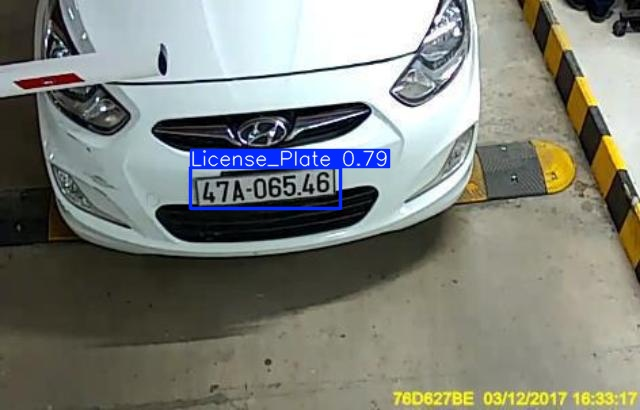

In [11]:
model = YOLO("/content/runs/detect/train2/weights/best.pt")


import cv2
from IPython.display import display
from PIL import Image


results = model("/content/License-Plate-Recognition-6/test/images/CarLongPlate212_jpg.rf.72323a1a186f06edfb69d1b344a0891c.jpg", conf=0.5)

for result in results:
    result.save(filename="/content/runs/detect/predict/CarLongPlate212_jpg.rf.72323a1a186f06edfb69d1b344a0891c.jpg")

img = Image.open("/content/runs/detect/predict/CarLongPlate212_jpg.rf.72323a1a186f06edfb69d1b344a0891c.jpg")
display(img)